In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [2]:
cust_data = pd.read_csv('Cust_Spend_Data.csv')
cust_data.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [3]:
numeric_data = cust_data.iloc[:, 2:]
numeric_data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)
scaled_df

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


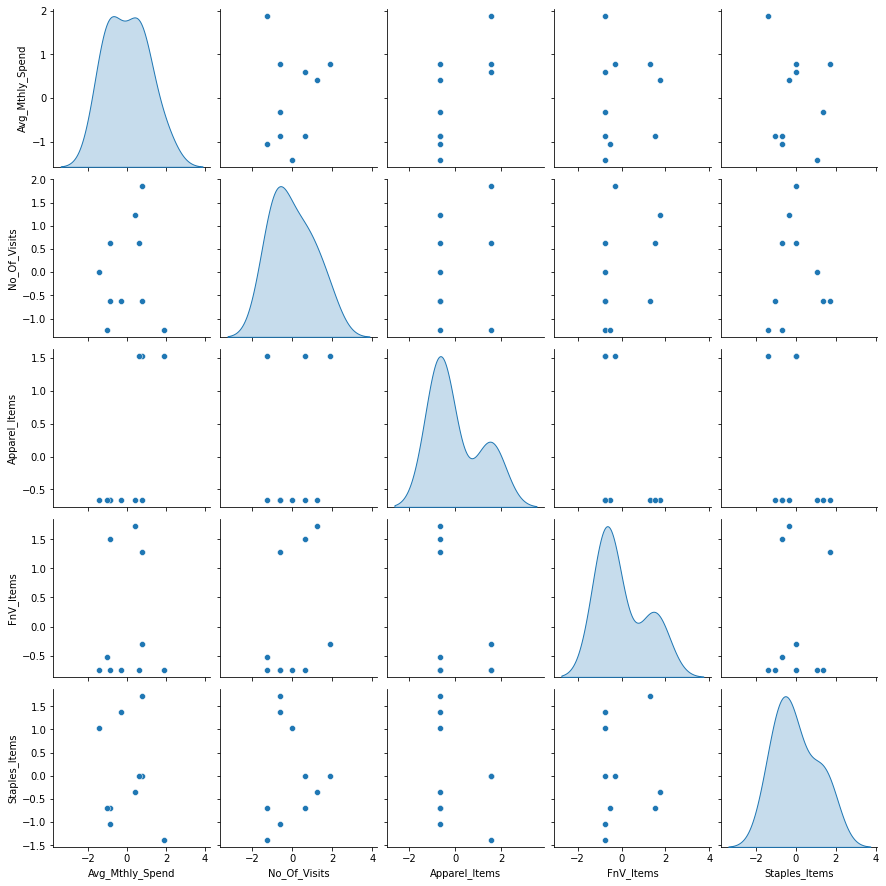

In [5]:
sns.pairplot(scaled_df, diag_kind='kde')

##### from pairplot we can see apparel_item and Fnv_items have 2 gaussians, so the data set needs atleast 2 clusters

In [6]:
# Create clustering model
def build_hierarchial_model(n_clusters, affinity, linkage, df):
    model=None
    if n_clusters:
        model = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
    else:
        model = AgglomerativeClustering(affinity=affinity, linkage=linkage)
    model.fit(df)
    return model

In [7]:
model = build_hierarchial_model(3, 'euclidean', 'average', scaled_df)
numeric_data['labels'] = model.labels_
numeric_data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [8]:
numeric_data.groupby('labels').mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [9]:
model = build_hierarchial_model(None, 'euclidean', 'average', scaled_df)
numeric_data['labels'] = model.labels_
numeric_data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,1
1,7000,3,0,10,9,0
2,7000,7,1,3,4,1
3,6500,5,1,1,4,1
4,6000,6,0,12,3,0
5,4000,3,0,1,8,0
6,2500,5,0,11,2,0
7,2500,3,0,1,1,0
8,2000,2,0,2,2,0
9,1000,4,0,1,7,0


In [10]:
numeric_data.groupby('labels').mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,3571.428571,3.714286,0.0,5.428571,4.571429
1,7833.333333,4.666667,1.0,1.666667,2.666667


In [11]:
def find_cophenet_index(df, metric, method):
    z= linkage(df, metric=metric, method=method)
    c, coph_dist = cophenet(z, pdist(df))
    return c, coph_dist, z

In [12]:
c, coph_dist, z = find_cophenet_index(scaled_df, 'euclidean', 'average')
c, coph_dist

(0.8681149436293064,
 array([3.78685213, 3.12171991, 3.12171991, 3.78685213, 3.78685213,
        3.78685213, 3.78685213, 3.78685213, 3.78685213, 3.78685213,
        3.78685213, 3.01368978, 3.23053961, 3.01368978, 3.23053961,
        3.23053961, 3.23053961, 1.33188797, 3.78685213, 3.78685213,
        3.78685213, 3.78685213, 3.78685213, 3.78685213, 3.78685213,
        3.78685213, 3.78685213, 3.78685213, 3.78685213, 3.78685213,
        3.23053961, 1.48252699, 3.23053961, 3.23053961, 3.23053961,
        3.23053961, 2.29187962, 2.29187962, 1.30817103, 3.23053961,
        3.23053961, 3.23053961, 0.76660834, 2.29187962, 2.29187962]))

In [13]:
z

array([[ 7.        ,  8.        ,  0.76660834,  2.        ],
       [ 5.        ,  9.        ,  1.30817103,  2.        ],
       [ 2.        ,  3.        ,  1.33188797,  2.        ],
       [ 4.        ,  6.        ,  1.48252699,  2.        ],
       [10.        , 11.        ,  2.29187962,  4.        ],
       [ 1.        , 13.        ,  3.01368978,  3.        ],
       [ 0.        , 12.        ,  3.12171991,  3.        ],
       [14.        , 15.        ,  3.23053961,  7.        ],
       [16.        , 17.        ,  3.78685213, 10.        ]])

In [14]:
def plot_dendrogram(cluster):
    plt.figure(figsize=(10, 5))
    plt.title('Agglomerative Hierarchical Clustering Dendogram')
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    dendrogram(cluster, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
    plt.tight_layout()

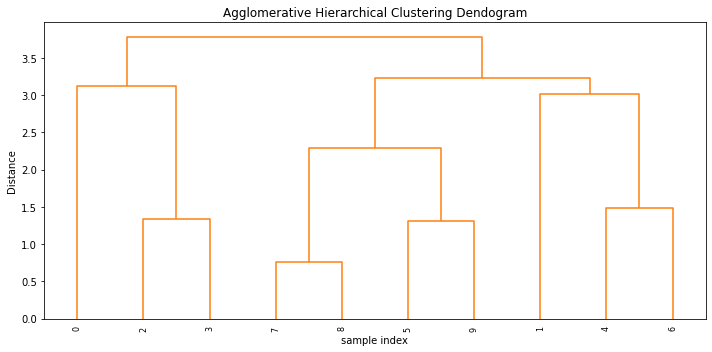

In [15]:
plot_dendrogram(z)

In [16]:
c, coph_dist, z = find_cophenet_index(scaled_df, 'euclidean', 'complete')
c, coph_dist

(0.8606955190809153,
 array([4.79609587, 3.59579104, 3.59579104, 4.79609587, 4.79609587,
        4.79609587, 4.79609587, 4.79609587, 4.79609587, 4.79609587,
        4.79609587, 3.18425555, 3.79803905, 3.18425555, 3.79803905,
        3.79803905, 3.79803905, 1.33188797, 4.79609587, 4.79609587,
        4.79609587, 4.79609587, 4.79609587, 4.79609587, 4.79609587,
        4.79609587, 4.79609587, 4.79609587, 4.79609587, 4.79609587,
        3.79803905, 1.48252699, 3.79803905, 3.79803905, 3.79803905,
        3.79803905, 2.47694276, 2.47694276, 1.30817103, 3.79803905,
        3.79803905, 3.79803905, 0.76660834, 2.47694276, 2.47694276]))

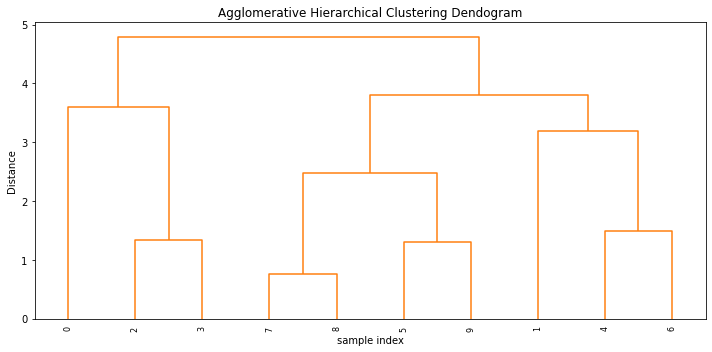

In [17]:
plot_dendrogram(z)

In [18]:
c, coph_dist, z = find_cophenet_index(scaled_df, 'euclidean', 'ward')
c, coph_dist

(0.8453818941339526,
 array([6.04286743, 3.56396731, 3.56396731, 6.04286743, 6.04286743,
        6.04286743, 6.04286743, 6.04286743, 6.04286743, 6.04286743,
        6.04286743, 3.37874675, 4.86954587, 3.37874675, 4.86954587,
        4.86954587, 4.86954587, 1.33188797, 6.04286743, 6.04286743,
        6.04286743, 6.04286743, 6.04286743, 6.04286743, 6.04286743,
        6.04286743, 6.04286743, 6.04286743, 6.04286743, 6.04286743,
        4.86954587, 1.48252699, 4.86954587, 4.86954587, 4.86954587,
        4.86954587, 3.06311476, 3.06311476, 1.30817103, 4.86954587,
        4.86954587, 4.86954587, 0.76660834, 3.06311476, 3.06311476]))

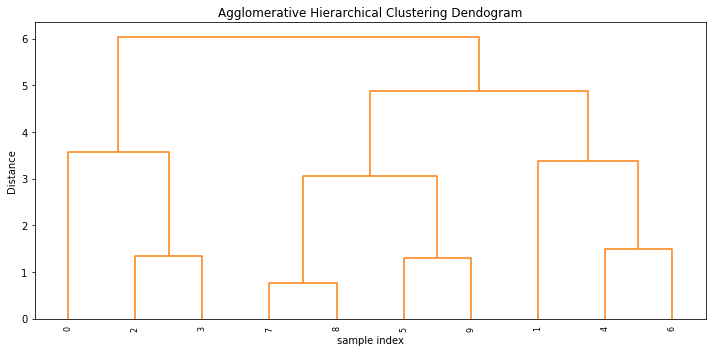

In [19]:
plot_dendrogram(z)

In [20]:
c, coph_dist, z = find_cophenet_index(scaled_df, 'mahalanobis', 'ward')
c, coph_dist

ValueError: Method 'ward' requires the distance metric to be Euclidean